In [ ]:
%pylab inline
# import almost all we need
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# ***1. Табличные данные и Pandas***

# **Задание 1**
Посмотрите на данные и скажите, что они из себя представляют сколько в таблице строк, какие столбцы?

In [8]:
import pandas as pd

# Чтение TSV-файла (разделитель - табуляция)
pass_data = pd.read_csv('/content/drive/MyDrive/chipotle.tsv', sep='\t')

# Посмотрим на данные
pass_data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [13]:
# Последние 10 строк таблицы
print("ПОСЛЕДНИЕ 10 СТРОК")
pass_data.tail(10)

ПОСЛЕДНИЕ 10 СТРОК


,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [14]:

# Основная информация о данных
print(" ИНФОРМАЦИЯ ")
print(f"Количество строк: {pass_data.shape[0]}")
print(f"Количество столбцов: {pass_data.shape[1]}")
print("\nСтолбцы:")
print(pass_data.columns.tolist())

 ИНФОРМАЦИЯ 
Количество строк: 4622
Количество столбцов: 5

Столбцы:
['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


# **Задание 2**
Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [15]:
# Количетсво заказов в выборке
pass_data['order_id'].nunique()

1834

In [16]:
# Количество купленных уникальных категорий товаров
pass_data['item_name'].nunique()

50

# **Задание 3**
 Есть ли в данных пропуски? В каких колонках?

In [17]:
# Только колонки с пропусками
pass_data.isnull().sum()[pass_data.isnull().sum() > 0]

,0
choice_description,1246


choice_description - это столбец, который обычно содержит дополнительную информацию о выборе ингредиентов или опций для товар и в этом столбце пропущено 1246 значений, в других нет пропусков


Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [19]:
# Заполнение пропусков более простым способом
pass_data = pass_data.fillna({'choice_description': ''})

# Проверяем
print("Остались ли пропуски:")
print(pass_data.isnull().sum())

Остались ли пропуски:
order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64


# **Задание 4**
 Посмотрите внимательнее на колонку с ценой товара. Какого она типа?

In [24]:
# Смотрим на тип данных колонки с ценой
print(f"Тип данных колонки item_price: {pass_data['item_price'].dtype}")
print(pass_data['item_price'].head())

Тип данных колонки item_price: object
0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object


Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [21]:
# lambda функция
pass_data['item_price_float'] = pass_data['item_price'].apply(lambda x: float(x.replace('$', '')))

# Проверяем
print(pass_data[['item_price', 'item_price_float']].head())

  item_price  item_price_float
0     $2.39               2.39
1     $3.39               3.39
2     $3.39               3.39
3     $2.39               2.39
4    $16.98              16.98


Какая средняя/минимальная/максимальная цена у товара?

In [25]:
pass_data['item_price_float'].describe()

,item_price_float
count,4622.000000
mean,7.464336
std,4.245557
min,1.090000
25%,3.390000
50%,8.750000
75%,9.250000
max,44.250000


In [26]:
price_stats = pass_data['item_price_float'].agg(['mean', 'min', 'max', 'median', 'std'])
print("Детальная статистика цен:")
for stat, value in price_stats.items():
    print(f"{stat}: ${value:.2f}")

Детальная статистика цен:
mean: $7.46
min: $1.09
max: $44.25
median: $8.75
std: $4.25


Удалите старую колонку с ценой.

С помощью  pass_data.drop('item_price', axis=1, inplace=True) мы уже удалили колонку с ценой

In [35]:
# Проверяем какие колонки есть сейчас
print("Текущие колонки в таблице:")
print(pass_data.columns.tolist())

Текущие колонки в таблице:
['order_id', 'quantity', 'item_name', 'choice_description', 'item_price_float']


# **Задание 5**
Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [38]:
# Если нужно учитывать, что цена может зависеть от quantity
# Создаем цену за единицу товара
pass_data['price_per_unit'] = pass_data['item_price_float'] / pass_data['quantity']

# Находим мин/макс цены за единицу товара
item_unit_prices = pass_data.groupby('item_name').agg({
    'price_per_unit': ['min', 'max'],
    'quantity': 'sum'
}).round(2)

item_unit_prices.columns = ['min_price_per_unit', 'max_price_per_unit', 'total_quantity']
item_unit_prices = item_unit_prices.reset_index()

print("САМЫЕ ДЕШЕВЫЕ ТОВАРЫ ")
cheapest_unit = item_unit_prices.sort_values('min_price_per_unit').head(5)
print(cheapest_unit[['item_name', 'min_price_per_unit', 'total_quantity']])

print("\nСАМЫЕ ДОРОГИЕ ТОВАРЫ")
expensive_unit = item_unit_prices.sort_values('max_price_per_unit', ascending=False).head(5)
print(expensive_unit[['item_name', 'max_price_per_unit', 'total_quantity']])

САМЫЕ ДЕШЕВЫЕ ТОВАРЫ 
            item_name  min_price_per_unit  total_quantity
6       Bottled Water                1.09             211
9         Canned Soda                1.09             126
10  Canned Soft Drink                1.25             351
37      Side of Chips                1.69             110
23              Chips                1.99             230

САМЫЕ ДОРОГИЕ ТОВАРЫ
                item_name  max_price_per_unit  total_quantity
15    Carnitas Salad Bowl               11.89               6
4     Barbacoa Salad Bowl               11.89              10
42       Steak Salad Bowl               11.89              31
16    Carnitas Soft Tacos               11.75              40
3   Barbacoa Crispy Tacos               11.75              12


# **Задание 6**
Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [39]:
# Если нужно считать по уникальным заказам (order_id)
chicken_bowl_by_order = pass_data[pass_data['item_name'] == 'Chicken Bowl'].groupby('order_id')['quantity'].sum()
orders_with_multiple = chicken_bowl_by_order[chicken_bowl_by_order > 1].count()

print(f"Уникальных заказов с больше чем 1 Chicken Bowl: {orders_with_multiple}")

Уникальных заказов с больше чем 1 Chicken Bowl: 114


# **Задание 7**
Какой средний чек у заказа? Сколько в среднем товаров покупают?

In [43]:
# Группируем данные по заказам и вычисляем статистики
print("СТАТИСТИКИ ПО ЗАКАЗАМ")

# Создаем таблицу с агрегированными данными по каждому заказу
orders_summary = pass_data.groupby('order_id').agg(
    total_amount=('item_price_float', 'sum'),  # общая сумма заказа
    total_items=('quantity', 'sum'),           # общее количество товаров
    unique_items=('item_name', 'nunique')      # количество уникальных товаров
).reset_index()

# Вычисляем средние значения
average_receipt = orders_summary['total_amount'].mean()
average_items = orders_summary['total_items'].mean()

print(f"Средний чек заказа: ${average_receipt:.2f}")
print(f"Среднее количество товаров в заказе: {average_items:.1f} шт")
print(f"Среднее количество уникальных товаров в заказе: {orders_summary['unique_items'].mean():.1f} шт")

СТАТИСТИКИ ПО ЗАКАЗАМ
Средний чек заказа: $18.81
Среднее количество товаров в заказе: 2.7 шт
Среднее количество уникальных товаров в заказе: 2.3 шт


# **Задание 8**
Сколько заказов содержали ровно 1 товар?

In [46]:
result = int((orders_summary['total_items'] == 1).sum())
print(f"Заказов с 1 товаром: {result}")

Заказов с 1 товаром: 56


# **Задание 9**
Какая самая популярная категория товара?

In [47]:
pass_data['item_name'].value_counts().head(1)

,count
item_name,
Chicken Bowl,726


# **Задание 10**
 Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой?

In [48]:
# Находим все виды Burrito
burrito_items = pass_data[pass_data['item_name'].str.contains('Burrito', na=False)]
burrito_types = burrito_items['item_name'].unique()

print("ВИДЫ BURRITO")
for i, burrito in enumerate(burrito_types, 1):
    print(f"{i}. {burrito}")

ВИДЫ BURRITO
1. Steak Burrito
2. Chicken Burrito
3. Barbacoa Burrito
4. Carnitas Burrito
5. Veggie Burrito
6. Burrito


In [49]:
# Какой Burrito чаще всего покупают
burrito_popularity = burrito_items['item_name'].value_counts()
print("\nСАМЫЙ ПОПУЛЯРНЫЙ BURRITO ")
most_popular_burrito = burrito_popularity.head(1)
print(f"{most_popular_burrito.index[0]}: {most_popular_burrito.values[0]} покупок")

print("\nПОПУЛЯРНОСТЬ ВСЕХ BURRITO")
for burrito, count in burrito_popularity.items():
    print(f"{burrito}: {count} покупок")


САМЫЙ ПОПУЛЯРНЫЙ BURRITO 
Chicken Burrito: 553 покупок

ПОПУЛЯРНОСТЬ ВСЕХ BURRITO
Chicken Burrito: 553 покупок
Steak Burrito: 368 покупок
Veggie Burrito: 95 покупок
Barbacoa Burrito: 91 покупок
Carnitas Burrito: 59 покупок
Burrito: 6 покупок


In [50]:
# Самый дорогой Burrito
burrito_prices = burrito_items.groupby('item_name')['item_price_float'].max().sort_values(ascending=False)
print("\nСАМЫЙ ДОРОГОЙ BURRITO")
most_expensive_burrito = burrito_prices.head(1)
print(f"{most_expensive_burrito.index[0]}: ${most_expensive_burrito.values[0]:.2f}")

print("\nЦЕНЫ ВСЕХ BURRITO (макс)")
for burrito, price in burrito_prices.items():
    print(f"{burrito}: ${price:.2f}")


САМЫЙ ДОРОГОЙ BURRITO
Chicken Burrito: $35.00

ЦЕНЫ ВСЕХ BURRITO (макс)
Chicken Burrito: $35.00
Veggie Burrito: $33.75
Steak Burrito: $27.75
Carnitas Burrito: $18.50
Barbacoa Burrito: $11.75
Burrito: $7.40


# **Задание 11**
В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [51]:
# Сумма каждого заказа
order_totals = pass_data.groupby('order_id')['item_price_float'].sum()

# Заказы где есть товар > 40% от суммы этого заказа
def has_expensive_item(order_group):
    order_total = order_group['item_price_float'].sum()
    return (order_group['item_price_float'] > order_total * 0.4).any()

expensive_orders = pass_data.groupby('order_id').apply(has_expensive_item)
result = expensive_orders.sum()

print(f"Заказов с товаром >40% от суммы чека: {result}")

Заказов с товаром >40% от суммы чека: 1624


/tmp/ipython-input-1731604159.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  expensive_orders = pass_data.groupby('order_id').apply(has_expensive_item)


# **Задание 12**
 Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [53]:
# Находим Diet Coke за $1.25
diet_coke = pass_data[
    (pass_data['choice_description'].str.contains('Diet Coke', na=False)) &
    (pass_data['item_price_float'] == 1.25)
]
total_quantity = diet_coke['quantity'].sum()

# Считаем процент увеличения
original = total_quantity * 1.25
new = total_quantity * 1.35
percent = ((new - original) / original) * 100

print(f"Выручка увеличилась на {percent:.1f}%")

# Корректируем данные
pass_data.loc[diet_coke.index, 'item_price_float'] = 1.35

Выручка увеличилась на 8.0%


# **Задание 13**
Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [55]:
import pandas as pd

# Создаем DataFrame с данными об аниме
data = {
    'title': [
        'Убийственный класс',
        'Стальной Алхимик: Братство',
        'Саики Кусуо',
        'Твоя апрельская ложь',
        'Нитидзё',
        'Steins;Gate',
        'Хоримия',
        'Моя геройская академия',
        'Fate/Zero',
        'Корзинка фруктов',
        'Плутон',
        'Галактика Таками',
        'Атака титанов',
        'Ковбой Бибоп',
        'Шова Генроку Ракуго Синдзю'
    ],
    'genres': [
        'комедия/боевик',
        'боевик',
        'комедия',
        'романтика/драма',
        'комедия',
        'фантастика/триллер',
        'романтика',
        'комедия/боевик',
        'триллер/боевик',
        'романтика',
        'триллер/боевик',
        'комедия/фантастика',
        'боевик/триллер',
        'фантастика/боевик',
        'драма'
    ]
}

# Создаем DataFrame
anime_df = pd.DataFrame(data)

# Переименовываем колонки как требуется
anime_df.columns = ['index', 'column1']

# Добавляем вторую колонку (можно оставить пустой или заполнить данными)
anime_df['column2'] = None

# Делаем первую колонку индексом
anime_df = anime_df.set_index('index')

print("DataFrame с аниме:")
print(anime_df)
print(f"\nРазмер: {anime_df.shape}")
print(f"Колонки: {list(anime_df.columns)}")

DataFrame с аниме:
                                       column1 column2
index                                                 
Убийственный класс              комедия/боевик    None
Стальной Алхимик: Братство              боевик    None
Саики Кусуо                            комедия    None
Твоя апрельская ложь           романтика/драма    None
Нитидзё                                комедия    None
Steins;Gate                 фантастика/триллер    None
Хоримия                              романтика    None
Моя геройская академия          комедия/боевик    None
Fate/Zero                       триллер/боевик    None
Корзинка фруктов                     романтика    None
Плутон                          триллер/боевик    None
Галактика Таками            комедия/фантастика    None
Атака титанов                   боевик/триллер    None
Ковбой Бибоп                 фантастика/боевик    None
Шова Генроку Ракуго Синдзю               драма    None

Размер: (15, 2)
Колонки: ['column1', 'column2

Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [56]:
# Сохранение с указанием полного пути
file_path = '/content/anime_data.csv'
anime_df.to_csv(file_path, index=False, header=False)
print(f"Файл сохранен по пути: {file_path}")

Файл сохранен по пути: /content/anime_data.csv


# ***2. Визуализации и matplotlib***

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [74]:
import pandas as pd
import datetime
import random

# Чтение TSV-файла (разделитель - табуляция)
pass_data = pd.read_csv('/content/drive/MyDrive/chipotle.tsv', sep='\t')

# Создание дат для заказов
start = datetime.datetime(2025, 1, 1)
end = datetime.datetime(2026, 1, 31)
delta_seconds = int((end - start).total_seconds())

# Создаем DataFrame с датами для каждого уникального order_id
unique_orders = pass_data['order_id'].unique()
dates = pd.DataFrame(index=unique_orders)
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(len(unique_orders))
]

# Добавляем колонку с датой в основной DataFrame
pass_data['date'] = pass_data['order_id'].map(dates['date'])

# Сохраняем как TSV-файл
pass_data.to_csv('/content/drive/MyDrive/chipotle_with_dates.tsv', sep='\t', index=False)

print("Файл успешно сохранен как chipotle_with_dates.tsv")
print(f"Размер DataFrame: {pass_data.shape}")
print(f"Колонки: {pass_data.columns.tolist()}")

Файл успешно сохранен как chipotle_with_dates.tsv
Размер DataFrame: (4622, 6)
Колонки: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price', 'date']


In [75]:
import pandas as pd

# Чтение TSV-файла (разделитель - табуляция)
pass_data = pd.read_csv('/content/drive/MyDrive/chipotle_with_dates.tsv', sep='\t')

# Посмотрим на данные
pass_data

,order_id,quantity,item_name,choice_description,item_price,date
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2025-03-11
1,1,1,Izze,[Clementine],$3.39,2025-03-11
2,1,1,Nantucket Nectar,[Apple],$3.39,2025-03-11
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2025-03-11
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,2025-06-30
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,2025-03-27
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,2025-03-27
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,2025-07-31
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,2025-07-31


# **Задание 1**
Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name.

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

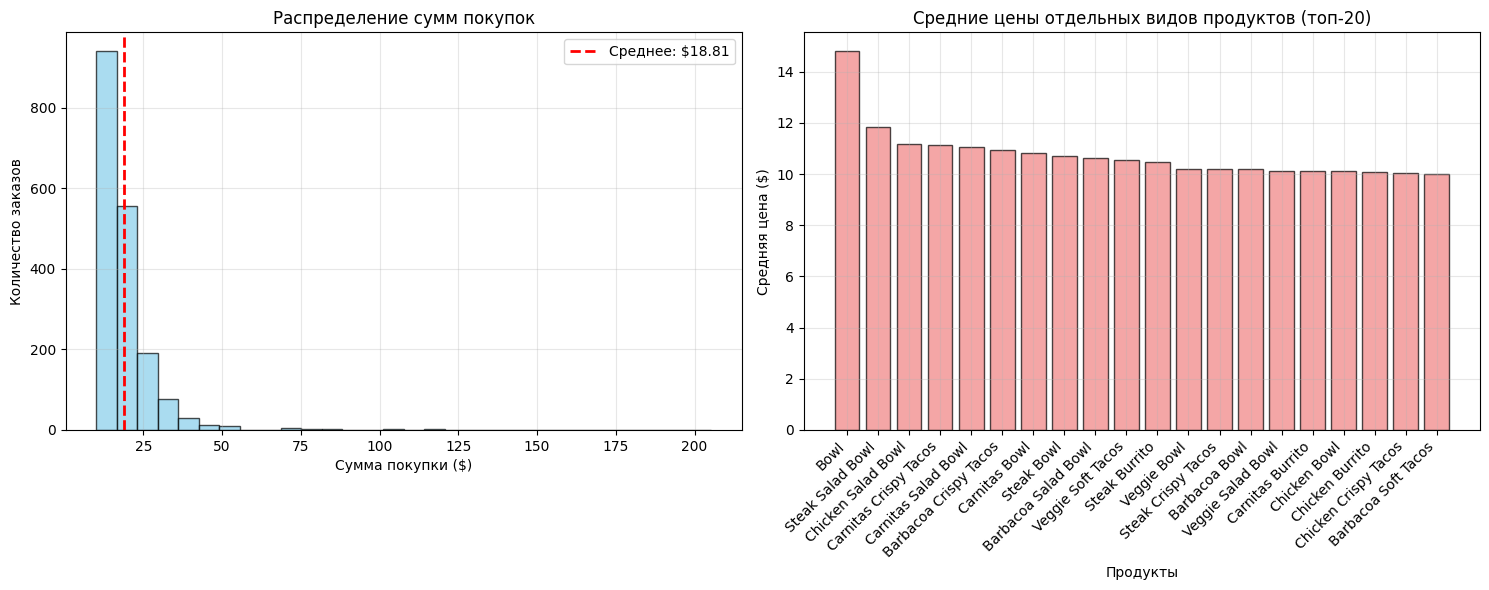

Общее количество уникальных заказов: 1834
Общее количество уникальных продуктов: 50
Средняя сумма заказа: $18.81
Медианная сумма заказа: $16.20

Топ-5 самых дорогих продуктов:
1. Bowl: $14.80
2. Steak Salad Bowl: $11.85
3. Chicken Salad Bowl: $11.17
4. Carnitas Crispy Tacos: $11.14
5. Carnitas Salad Bowl: $11.06


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Предварительная обработка данных: преобразуем item_price в числовой формат
pass_data['item_price_numeric'] = pass_data['item_price'].str.replace(r'[\$,]', '', regex=True).astype(float)

# Создаем фигуру с двумя субплогами
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Гистограмма распределения сумм покупок
# Считаем сумму покупок для каждого заказа
order_totals = pass_data.groupby('order_id')['item_price_numeric'].sum()

# Строим гистограмму
ax1.hist(order_totals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Сумма покупки ($)')
ax1.set_ylabel('Количество заказов')
ax1.set_title('Распределение сумм покупок')
ax1.grid(True, alpha=0.3)

# Добавляем вертикальную линию для среднего значения
mean_total = order_totals.mean()
ax1.axvline(mean_total, color='red', linestyle='--', linewidth=2, label=f'Среднее: ${mean_total:.2f}')
ax1.legend()

# 2. Гистограмма средних цен отдельных видов продуктов
# Считаем среднюю цену для каждого item_name
item_prices = pass_data.groupby('item_name')['item_price_numeric'].mean().sort_values(ascending=False)

# Берем топ-20 самых дорогих продуктов для наглядности
top_items = item_prices.head(20)

# Строим гистограмму
ax2.bar(range(len(top_items)), top_items.values, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Продукты')
ax2.set_ylabel('Средняя цена ($)')
ax2.set_title('Средние цены отдельных видов продуктов (топ-20)')
ax2.grid(True, alpha=0.3)

# Настраиваем подписи на оси X
ax2.set_xticks(range(len(top_items)))
ax2.set_xticklabels(top_items.index, rotation=45, ha='right')

# Улучшаем layout
plt.tight_layout()
plt.show()

# Выводим дополнительную информацию
print(f"Общее количество уникальных заказов: {len(order_totals)}")
print(f"Общее количество уникальных продуктов: {len(item_prices)}")
print(f"Средняя сумма заказа: ${order_totals.mean():.2f}")
print(f"Медианная сумма заказа: ${order_totals.median():.2f}")
print(f"\nТоп-5 самых дорогих продуктов:")
for i, (item, price) in enumerate(top_items.head().items(), 1):
    print(f"{i}. {item}: ${price:.2f}")

# **Задание 2**
Постройте график зависимости суммы покупок от дней.

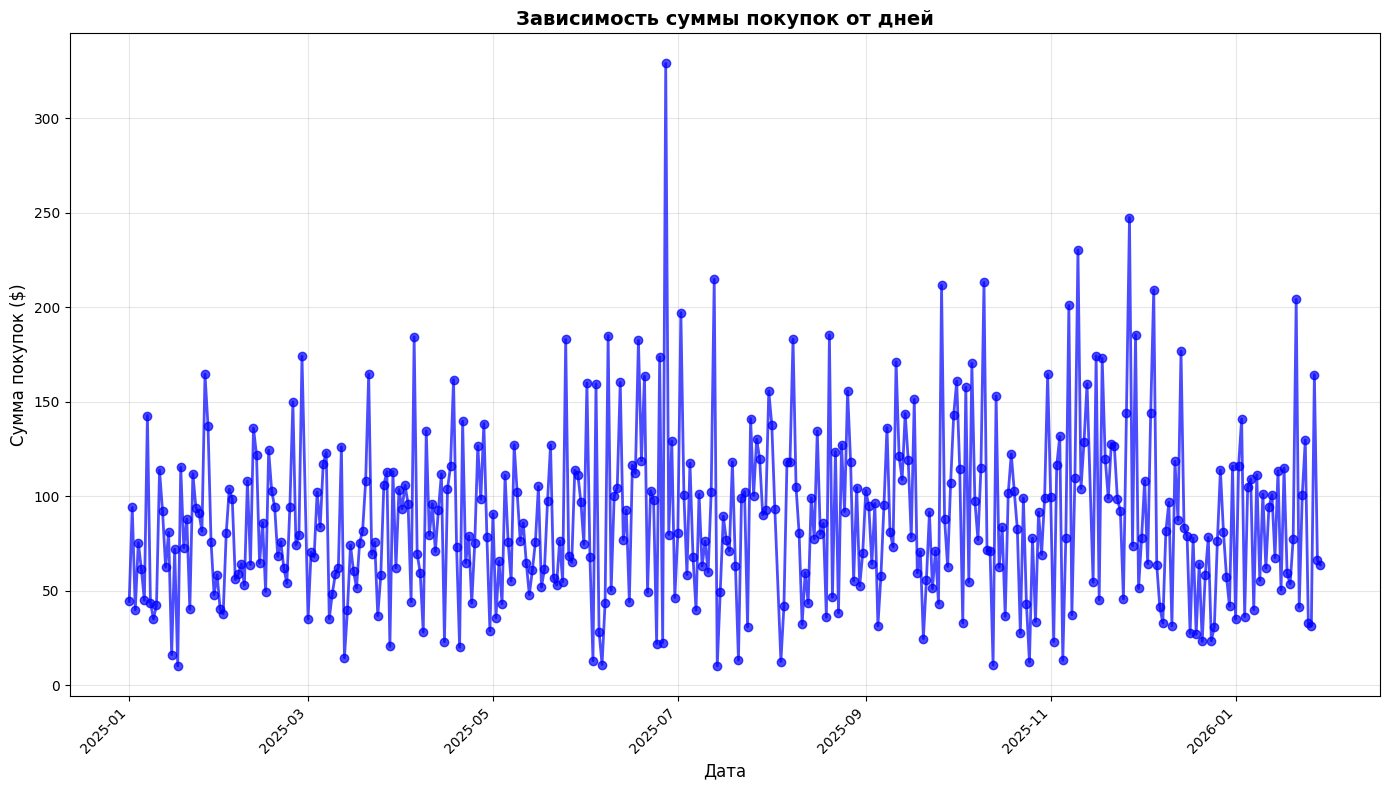

Период: с 2025-01-01 00:00:00 по 2026-01-29 00:00:00
Всего дней: 391
Средняя дневная выручка: $88.24


In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Группируем по дате и считаем сумму покупок за каждый день
daily_totals = pass_data.groupby('date')['item_price_numeric'].sum()

# Сортируем по дате для правильного отображения
daily_totals = daily_totals.sort_index()

# Строим график
plt.figure(figsize=(14, 8))
plt.plot(daily_totals.index, daily_totals.values, marker='o', linewidth=2, markersize=6, color='blue', alpha=0.7)

plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сумма покупок ($)', fontsize=12)
plt.title('Зависимость суммы покупок от дней', fontsize=14, fontweight='bold')

# Просто поворачиваем даты без сложных манипуляций
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Период: с {daily_totals.index.min()} по {daily_totals.index.max()}")
print(f"Всего дней: {len(daily_totals)}")
print(f"Средняя дневная выручка: ${daily_totals.mean():.2f}")

# **Задание 3**
Постройте средних сумм покупок по дням недели (bar plot).

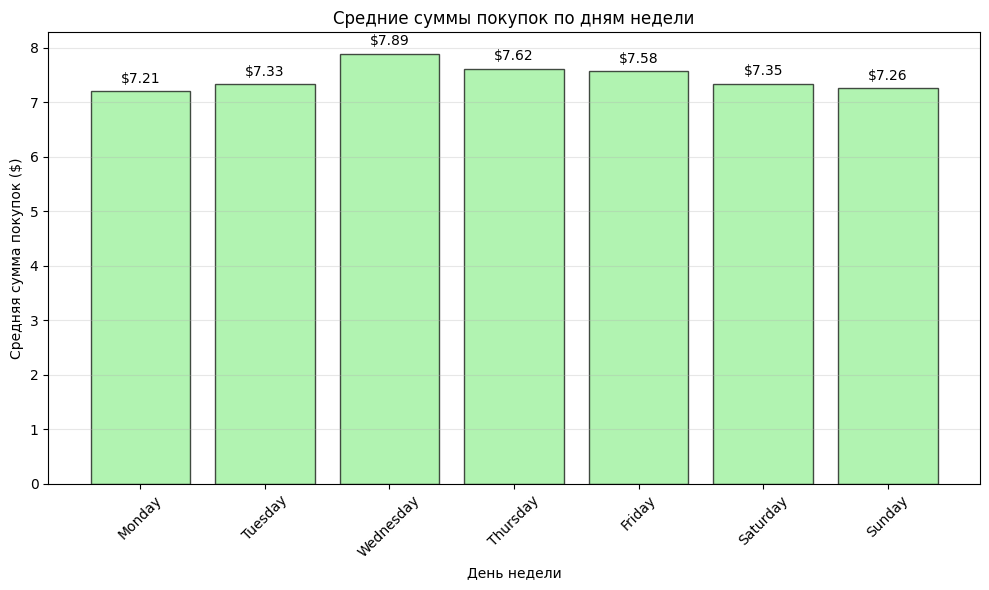

Средние суммы покупок по дням недели:
Monday: $7.21
Tuesday: $7.33
Wednesday: $7.89
Thursday: $7.62
Friday: $7.58
Saturday: $7.35
Sunday: $7.26


In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем дату в формат datetime и извлекаем день недели
pass_data['date'] = pd.to_datetime(pass_data['date'])
pass_data['day_of_week'] = pass_data['date'].dt.day_name()

# Создаем правильный порядок дней недели
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Группируем по дню недели и считаем среднюю сумму покупок
daily_avg = pass_data.groupby('day_of_week')['item_price_numeric'].mean().reindex(days_order)

# Строим bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(daily_avg.index, daily_avg.values, color='lightgreen', edgecolor='black', alpha=0.7)

# Добавляем значения на столбцы
for bar, value in zip(bars, daily_avg.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'${value:.2f}', ha='center', va='bottom')

plt.xlabel('День недели')
plt.ylabel('Средняя сумма покупок ($)')
plt.title('Средние суммы покупок по дням недели')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Выводим статистику
print("Средние суммы покупок по дням недели:")
for day, avg in daily_avg.items():
    print(f"{day}: ${avg:.2f}")

# **Задание 4**
Постройте график зависимости денег за товар от купленного количества (scatter plot) и сохраните график в формате pdf (так он останется векторизованным).

График сохранен как 'revenue_vs_quantity.pdf'


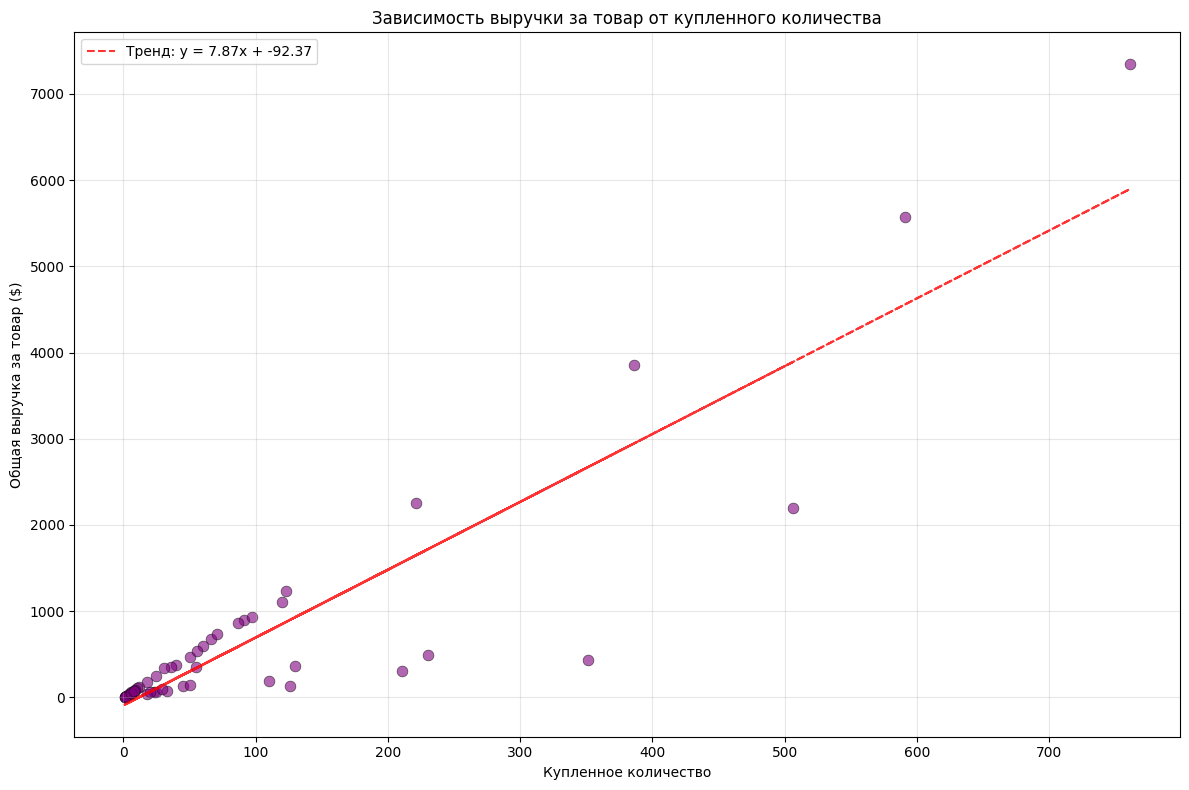

Количество уникальных товаров: 50
Общая корреляция: 0.903

Топ-5 товаров по количеству продаж:
Chicken Bowl: 761 шт., $7342.73
Chicken Burrito: 591 шт., $5575.82
Chips and Guacamole: 506 шт., $2201.04
Steak Burrito: 386 шт., $3851.43
Canned Soft Drink: 351 шт., $438.75


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Группируем по товару: суммарное количество и суммарная выручка
product_stats = pass_data.groupby('item_name').agg({
    'quantity': 'sum',
    'item_price_numeric': 'sum'
}).reset_index()

# Строим scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(product_stats['quantity'], product_stats['item_price_numeric'],
           alpha=0.6, s=60, color='purple', edgecolors='black', linewidth=0.5)

plt.xlabel('Купленное количество')
plt.ylabel('Общая выручка за товар ($)')
plt.title('Зависимость выручки за товар от купленного количества')
plt.grid(True, alpha=0.3)

# Добавляем трендовую линию
z = np.polyfit(product_stats['quantity'], product_stats['item_price_numeric'], 1)
p = np.poly1d(z)
plt.plot(product_stats['quantity'], p(product_stats['quantity']), "r--", alpha=0.8,
         label=f'Тренд: y = {z[0]:.2f}x + {z[1]:.2f}')

plt.legend()
plt.tight_layout()

# Сохраняем в PDF ПЕРЕД показом
plt.savefig('revenue_vs_quantity.pdf', format='pdf', bbox_inches='tight', dpi=300)
print("График сохранен как 'revenue_vs_quantity.pdf'")

# Показываем график
plt.show()

# Выводим статистику
print(f"Количество уникальных товаров: {len(product_stats)}")
print(f"Общая корреляция: {product_stats['quantity'].corr(product_stats['item_price_numeric']):.3f}")
print("\nТоп-5 товаров по количеству продаж:")
top_quantity = product_stats.nlargest(5, 'quantity')[['item_name', 'quantity', 'item_price_numeric']]
for _, row in top_quantity.iterrows():
    print(f"{row['item_name']}: {row['quantity']} шт., ${row['item_price_numeric']:.2f}")

1. Тренд (красная пунктирная линия) показывает общую тенденцию зависимости между количеством проданного товара и выручкой от него.

2. Фиолетовые точки на графике представляют собой отдельные товары (продукты) из вашего набора данных. Каждая точка соответствует одному уникальному товару из колонки item_name.


3. Что показывает каждая точка:

-Положение по оси X - общее количество проданных единиц этого
товара

-Положение по оси Y - общая выручка ($) от продаж этого товара

-Размер точки - одинаковый для всех (фиксированный размер s=60)

-Цвет - фиолетовый для визуального выделения

Пример: Если есть точка с координатами (150, 1200), это значит:

Товар был продан 150 раз (включая все заказы)

Общая выручка от этого товара составила $1200


4. Паттерны, которые можно увидеть:

-Точки в правом верхнем углу - популярные и дорогие товары

-Точки в правом нижнем углу - популярные, но дешевые товары

-Точки в левом верхнем углу - редкие, но дорогие товары

-Точки в левом нижнем углу - редкие и дешевые товары